### Tucker Decomposition e Reconstrução
#### Esta é uma implementação que aplica a Tucker Decomposition em uma imagem, gerando cores de [3,3,3], [10,10,3] e [20,20,3] e compara suas reconstruções com a imagem original.

In [1]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import tucker
from keras import utils

In [61]:
# Imagem para tensor Keras
img = utils.load_img("rock_lee.jpg", target_size=(150,150))
img_tensor = utils.img_to_array(img)
img_tensor /= 255.

print(img_tensor.shape)

(150, 150, 3)


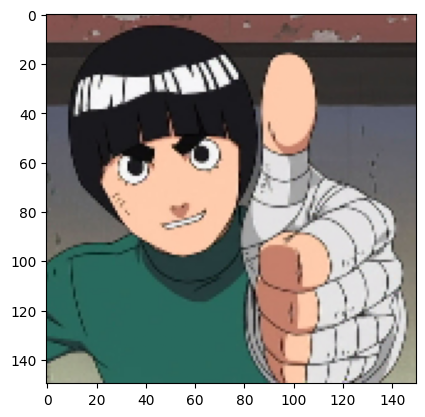

In [62]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor)
plt.show()

In [63]:
#convertendo tensor do Keras para tensor do TensorLy
img_tl = tl.tensor(img_tensor)

In [64]:
# Aplicando a decomposição de tucker e gerando o core e os factors
core_3, factors_3 = tucker(img_tl, rank = [3,3,3])
core_10, factors_10 = tucker(img_tl, rank = [10,10,3])
core_20, factors_20 = tucker(img_tl, rank = [20,20,3])

In [65]:
print("Shape do tensor original:")
print(tl.shape(img_tl))

print("Shape do núcleo e das matrizes Tucker core-3:")
print(core_3.shape)
print(factors_3[0].shape)
print(factors_3[1].shape)
print(factors_3[2].shape)

print("Shape do núcleo das matrizes Tucker core-10:")
print(core_10.shape)
print(factors_10[0].shape)
print(factors_10[1].shape)
print(factors_10[2].shape)

print("Shape do núcleo das matrizes Tucker core-10:")
print(core_20.shape)
print(factors_20[0].shape)
print(factors_20[1].shape)
print(factors_20[2].shape)

print("Tensor original =", np.prod(tl.shape(img_tl)), "entradas")
print("Tucker rank-3 = ", np.prod(factors_3[0].shape) + np.prod(factors_3[1].shape) + np.prod(factors_3[2].shape) + np.prod(core_3.shape), "entradas")
print("Tucker rank-10 = ", np.prod(factors_10[0].shape) + np.prod(factors_10[1].shape) + np.prod(factors_10[2].shape) + np.prod(core_10.shape), "entradas")
print("Tucker rank-20 = ", np.prod(factors_20[0].shape) + np.prod(factors_20[1].shape) + np.prod(factors_20[2].shape) + np.prod(core_20.shape), "entradas")

Shape do núcleo original:
(150, 150, 3)
Shape do núcleo e das matrizes Tucker core-3:
(3, 3, 3)
(150, 3)
(150, 3)
(3, 3)
Shape do núcleo das matrizes Tucker core-10:
(10, 10, 3)
(150, 10)
(150, 10)
(3, 3)
Shape do núcleo das matrizes Tucker core-10:
(20, 20, 3)
(150, 20)
(150, 20)
(3, 3)
Tensor original = 67500 entradas
Tucker rank-3 =  936 entradas
Tucker rank-10 =  3309 entradas
Tucker rank-20 =  7209 entradas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


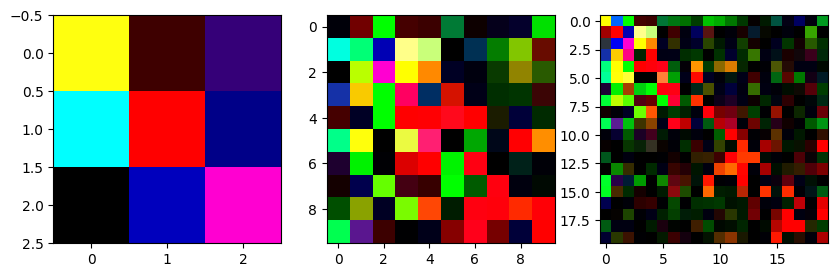

In [66]:
figure = plt.figure(figsize = (10,10))

figure.add_subplot(1,3,1)
plt.imshow(core_3.squeeze())
figure.add_subplot(1,3,2)
plt.imshow(core_10.squeeze())
figure.add_subplot(1,3,3)
plt.imshow(core_20.squeeze())

plt.show()

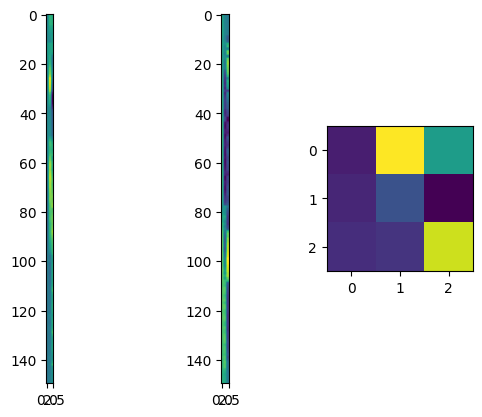

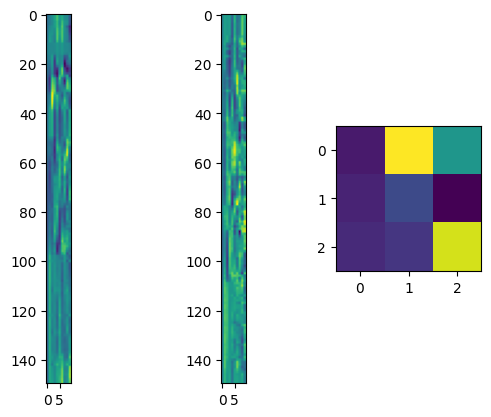

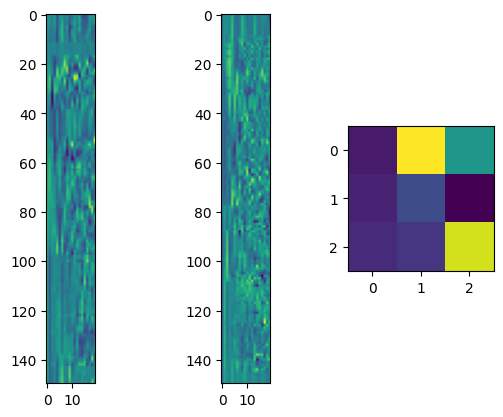

In [67]:
figure = plt.figure()

# Plotando as matrizes da Tucker core-3
figure.add_subplot(1, 3, 1)
plt.imshow(factors_3[0].squeeze())
figure.add_subplot(1, 3, 2)
plt.imshow(factors_3[1].squeeze())
figure.add_subplot(1, 3, 3)
plt.imshow(factors_3[2].squeeze())
plt.show()

figure = plt.figure()

# Plotando as matrizes da Tucker core-10
figure.add_subplot(1, 3, 1)
plt.imshow(factors_10[0].squeeze())
figure.add_subplot(1, 3, 2)
plt.imshow(factors_10[1].squeeze())
figure.add_subplot(1, 3, 3)
plt.imshow(factors_10[2].squeeze())
plt.show()

figure = plt.figure()

# Plotando as matrizes da Tucker core-10
figure.add_subplot(1, 3, 1)
plt.imshow(factors_20[0].squeeze())
figure.add_subplot(1, 3, 2)
plt.imshow(factors_20[1].squeeze())
figure.add_subplot(1, 3, 3)
plt.imshow(factors_20[2].squeeze())
plt.show()

In [68]:
# Reconstruindo o tensor original a partir do nucleo e dos fatores
reconstruct_3 = tl.tucker_to_tensor((core_3, factors_3))
reconstruct_10 = tl.tucker_to_tensor((core_10, factors_10))
reconstruct_20 = tl.tucker_to_tensor((core_20, factors_20))

In [69]:
print(reconstruct_3.shape)
print(reconstruct_10.shape)
print(reconstruct_20.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


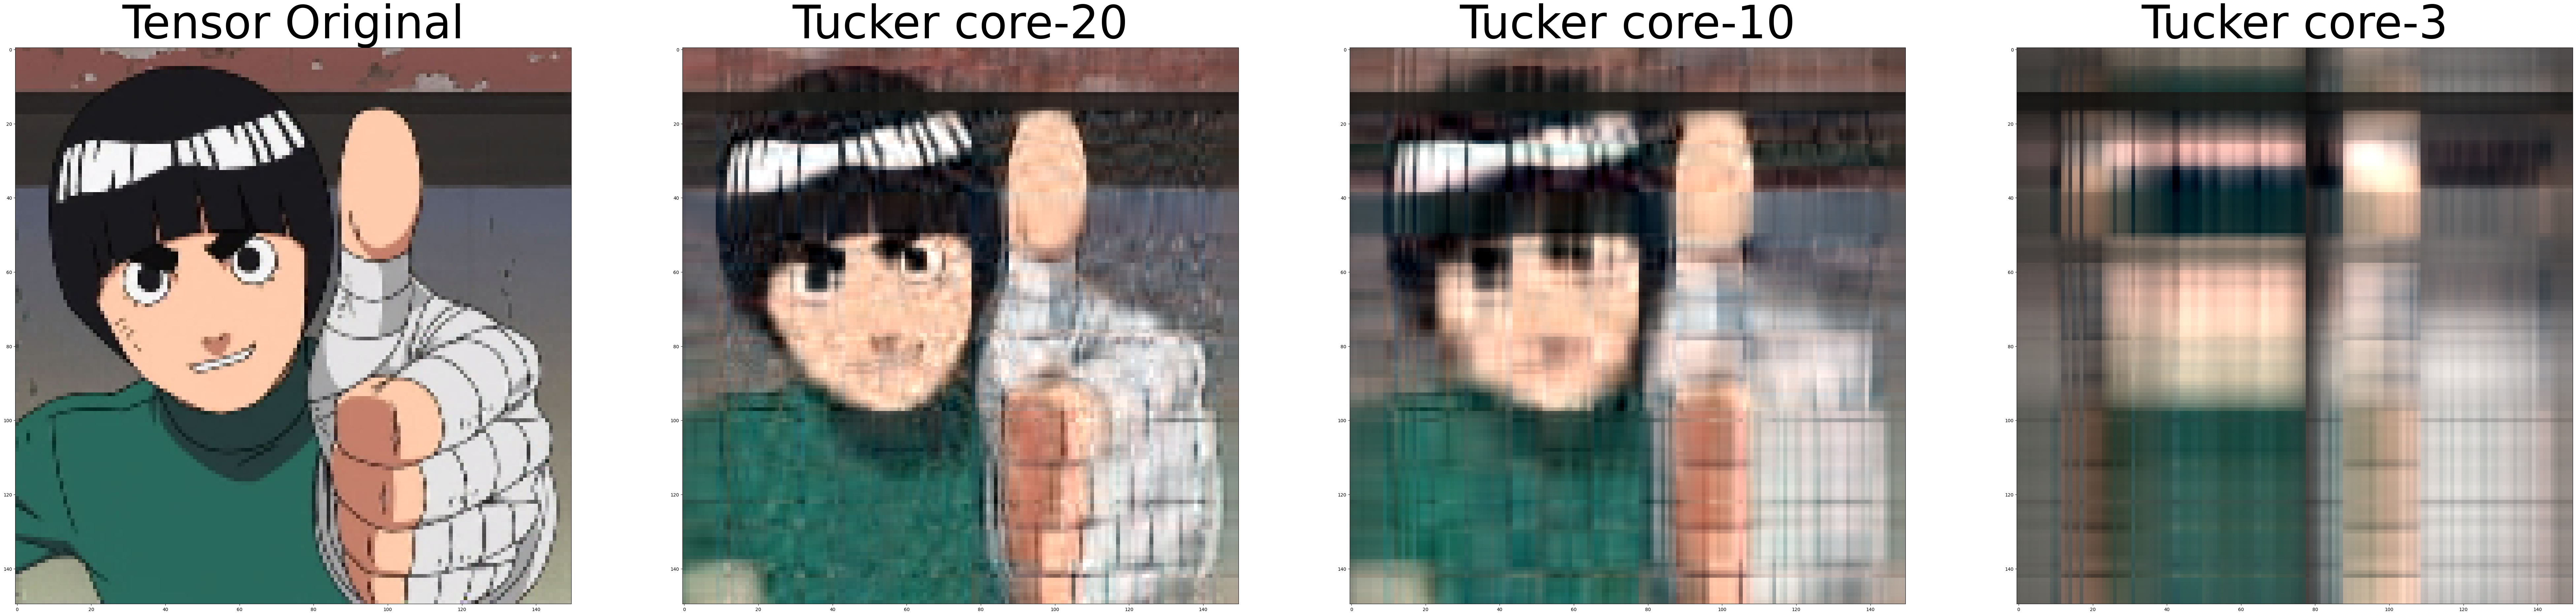

In [70]:
    figure = plt.figure(figsize = (100, 100))

    figure.add_subplot(1,4,1)
    plt.imshow(img_tensor.squeeze())
    plt.title("Tensor Original", size = 100)

    figure.add_subplot(1,4,2)
    plt.imshow(reconstruct_20.squeeze())
    plt.title("Tucker core-20", size = 100)

    figure.add_subplot(1,4,3)
    plt.imshow(reconstruct_10.squeeze())
    plt.title("Tucker core-10", size = 100)

    figure.add_subplot(1,4,4)
    plt.imshow(reconstruct_3.squeeze())
    plt.title("Tucker core-3", size = 100)

    plt.show()